<a href="https://colab.research.google.com/github/AshKate98/AHI_Ashley_streamlit_Example/blob/main/AHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing and installation of packages

In [ ]:
import pandas as pd
!pip install sweetviz
import sweetviz
import sweetviz as sv
!pip install pandas_profiling

#Packages data visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading of CSV Files

In [ ]:
df_Hospital = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Deployment_Streamlit/hospital_info.csv')
df_Outpatient = Outpatient_2015 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Deployment_Streamlit/outpatient_2015.csv')
df_Inpatient = Inpatient_2015 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Deployment_Streamlit/inpatient_2015.csv')

Length

In [ ]:
print('Hospital_infoLength: ', len(df_Hospital))
print('OutpatientLength: ', len(df_Outpatient))
print('InpatientLength: ', len(df_Inpatient))

Hospital_infoLength:  5314
OutpatientLength:  32532
InpatientLength:  201876


#Questions
1. Hospital Q: What are the most common hospital type? For New York how many Acute care Hospitals are ranked number 1?
2. Oupatient Q: How many outpatient facilities are there within each state and how do they compare? 
3. Inpatient Question: What are the most expensive drg_definitions for each NY state and top 3 average total payments overall?
4. Stony Brook Question comparison to North carolina?
5. Top Stony Brook APC's?
6. Top Stony Brook DRG's?

#Loading and Displaying Df_Hospital

In [ ]:
df_Hospital

provider_id  ...                              location
0         310119  ...            POINT (-74.19213 40.74095)
1         310016  ...  POINT (-74.05014200000001 40.734876)
2         390123  ...          POINT (-75.611502 40.243941)
3         440002  ...           POINT (-88.831973 35.63954)
4         330080  ...          POINT (-73.924072 40.817681)
...          ...  ...                                   ...
5309      49001F  ...          POINT (-77.142608 38.705877)
5310      26002F  ...          POINT (-92.116491 37.766471)
5311      50014F  ...         POINT (-122.680142 48.336875)
5312      21007F  ...           POINT (-77.096801 38.99949)
5313      45070F  ...          POINT (-97.775132 31.130337)

[5314 rows x 29 columns]

#Cleaning of df_Hospital

In [ ]:
!pip install pyjanitor

In [ ]:
from janitor import clean_names, remove_empty


In [ ]:
df_Hospital = pd.DataFrame.from_dict(df_Hospital)
df = clean_names(df_Hospital)
df = remove_empty(df_Hospital)

In [ ]:
display(df_Hospital)

provider_id  ...                              location
0         310119  ...            POINT (-74.19213 40.74095)
1         310016  ...  POINT (-74.05014200000001 40.734876)
2         390123  ...          POINT (-75.611502 40.243941)
3         440002  ...           POINT (-88.831973 35.63954)
4         330080  ...          POINT (-73.924072 40.817681)
...          ...  ...                                   ...
5309      49001F  ...          POINT (-77.142608 38.705877)
5310      26002F  ...          POINT (-92.116491 37.766471)
5311      50014F  ...         POINT (-122.680142 48.336875)
5312      21007F  ...           POINT (-77.096801 38.99949)
5313      45070F  ...          POINT (-97.775132 31.130337)

[5314 rows x 29 columns]

#Hospital Type 

Variable explored- Hospital type for the total number of hospitals
below is a Hospital_type_def created with the Hospital_df once cleaned displaying the type of hospitals labeled as Acute, critical care, children care, department of defense, and pyschiatric hospitals.
As we can answer the following question that Acute care hospitals are the most frequent hospitals, while leading into the next question!
1. Acute  3256
2. Critical 1355
3. Pyschiatric 573

In [ ]:
df_Hospital['hospital_type'].unique()

array(['Acute Care Hospitals', 'Critical Access Hospitals', 'Childrens',
       'Psychiatric', 'Acute Care - Department of Defense'], dtype=object)

In [ ]:
Hospital_Type_df = pd.value_counts(df_Hospital['hospital_type'])
Hospital_Type_df = pd.DataFrame(Hospital_Type_df)
Hospital_Type_df = Hospital_Type_df.reset_index()
Hospital_Type_df.columns = ['hospital type', 'Number of Hospitals']

#Barplot

Text(0.5, 1.0, 'Count of the different Types of Hospitals(Acute/Critical/Childrens)')

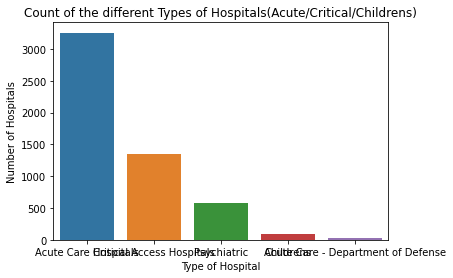

In [ ]:
ax = sns.barplot(x = 'hospital type', y= 'Number of Hospitals', data = Hospital_Type_df)
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospitals(Acute/Critical/Childrens)')

In [ ]:
display(Hospital_Type_df)

hospital type  Number of Hospitals
0                Acute Care Hospitals                 3256
1           Critical Access Hospitals                 1355
2                         Psychiatric                  573
3                           Childrens                   95
4  Acute Care - Department of Defense                   35

As we can see here is the total counts of different types of hospital where Acute Care is the most common for the Hospital dataset & for NY.


#Hospital Type Total Frequency

Now lets seperate acute care hospitals with df_Hospital to show the hospital type of Acute care and the overall rating of 1 for 5 unique states 
#creating a df of state_acute_1

In [ ]:
State_acute_1=df_Hospital.loc[(df_Hospital["hospital_type"]=="Acute Care Hospitals") & (df_Hospital["hospital_overall_rating"]=="1"),["state"]]
State_acute_1.head()
#State_acute_1['State'].unique()

state
0    NJ
1    NJ
2    PA
3    TN
4    NY

In [ ]:
S_A_1=State_acute_1['state'].value_counts()
index=S_A_1.index
values=S_A_1.values
values

array([46, 27, 24, 11, 10,  9,  8,  8,  7,  6,  6,  5,  5,  5,  4,  4,  4,
        4,  4,  3,  3,  3,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1])

#Barplot- Used to answer the question of what states have the most Acute Care Hopsitals with a 1 rating overall!

[Text(0, 0.5, 'states'),
 Text(0.5, 0, 'Total number of Acute Care hospitals with 1 rating')]

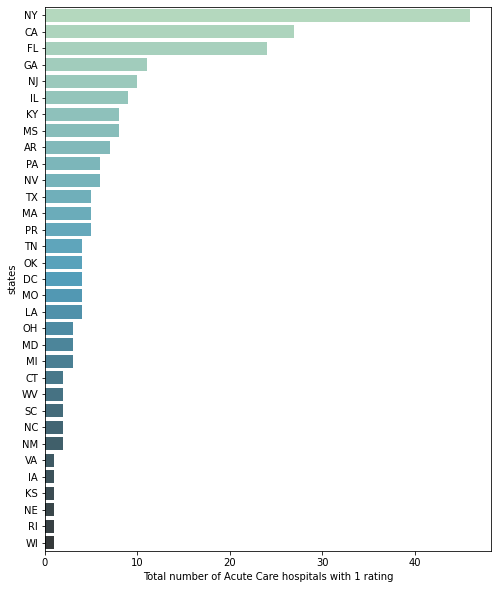

In [ ]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=index,x=values,palette='GnBu_d')
ax.set(xlabel='Total number of Acute Care hospitals with 1 rating', ylabel='states')

# Pivot Table

Text(0.5, 1.0, 'Total rating of the types of hospitals under the ownership of various community')

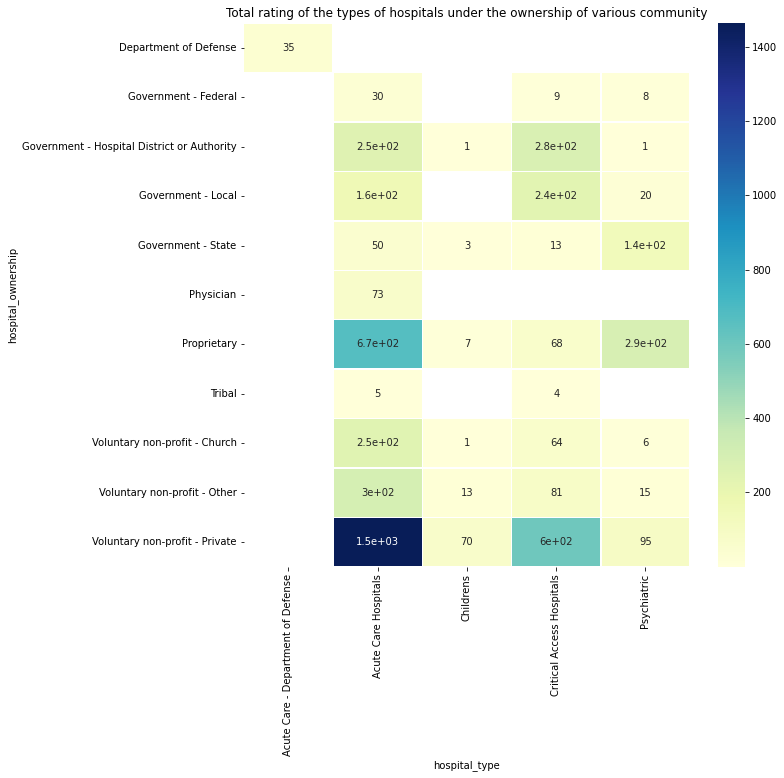

In [ ]:
a= pd.pivot_table(df_Hospital,values=['hospital_overall_rating'],index=['hospital_ownership'],columns=['hospital_type'],aggfunc='count',margins=False)

plt.figure(figsize=(10,10))
sns.heatmap(a['hospital_overall_rating'],linewidths=.5,annot=True,vmin=0.01,cmap='YlGnBu')
plt.title('Total rating of the types of hospitals under the ownership of various community')

#Hospital Q: What is the total number of acute care hospitals for NY ranked number 1? 
As we can see here on this barchart that shows each state broke down to see how many hospitals each state has that are acute care with a 1 rating. Answering the question of who has the most acute care hospitals with a 1 rating with 
1. NY-Having acute care hospitals with a 1 rating 46 hospital total
2. CA-Having the 2nd most acute care hospitals with a 1 rating 
3. FL-Having the 3rd most acute care hopspitals with a 1 rating 

# Hospital ownership with total number of hospitals
Used to complete a transformation with transforming ownership into 3 catagories 
Government
Non-or profit
Private

#Barplot

In [ ]:
Hospital_owner = pd.value_counts(df_Hospital['hospital_ownership'])
Hospital_owner = pd.DataFrame(Hospital_owner)
Hospital_owner = Hospital_owner.reset_index()
Hospital_owner.columns = ['Hospital Ownership', 'Number of Hospitals']

Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

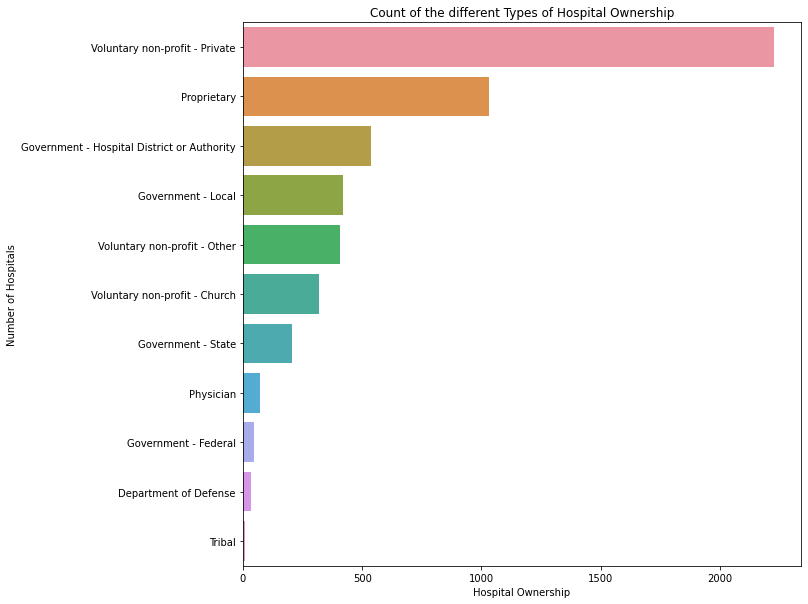

In [ ]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(y = 'Hospital Ownership', x= 'Number of Hospitals', data = Hospital_owner)
ax.set(xlabel = 'Hospital Ownership', ylabel = 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospital Ownership')

In [ ]:
display(Hospital_owner)

Hospital Ownership  Number of Hospitals
0                Voluntary non-profit - Private                 2227
1                                   Proprietary                 1031
2   Government - Hospital District or Authority                  536
3                            Government - Local                  419
4                  Voluntary non-profit - Other                  408
5                 Voluntary non-profit - Church                  321
6                            Government - State                  208
7                                     Physician                   73
8                          Government - Federal                   47
9                         Department of Defense                   35
10                                       Tribal                    9

As we can see here on this barchart that Voluntary non-profit private hospitals are most common type of ownership for hopsitals the following are 2nd proprietary, 3rd Government- district or authority. 
1. Voluntary non-profit 2227
2. Proprietary 1031
3. Government- district or authority 536
This information is needed to answer the question of what type of hospital ownership is most common in the dataframe for df_Hospital. As well as to perform a transformation to be able to breakdwon hopsital ownershup into 3 catagories such as government, non-profit, and private categories.

# Hospital Ownership Transformation

In [ ]:
def hospital_ownershiptransform(row) :
  if row['hospital_ownership'] == 'Government - Hospital District or Authority’,‘Department Of Defense‘,‘Government-Local’,‘Physician’,‘Government - State’,‘Government Federal' :
    return 'Government'
  elif row['hospital_ownership'] == 'Non-Profit Voluntary’,’Voluntary non-profit - Church’, ‘non-profit- Other’,’Proprietary' :
      return 'Non-profit'
  elif row['hospital_ownership'] == 'Voluntary non-profit - Private' :
      return 'Private'
  else:
    return 'NAN'

In [ ]:
df_Hospital['hospital_ownership_mod'] = df_Hospital.apply(hospital_ownershiptransform, 1)
df_Hospital.head(15)


In [ ]:
df_Hospital['hospital_ownership']. value_counts(). idxmax()

'Voluntary non-profit - Private'

# Load df_Outpatient

In [ ]:
df_Outpatient

#Cleaning df_Outpatient

In [ ]:
df_Outpatient = pd.DataFrame.from_dict(df_Outpatient)
df = clean_names(df_Outpatient)
df = remove_empty(df_Outpatient)

In [ ]:
display(df_Outpatient)

#OUTPATIENT QUESTION:
# How many Hospitals for each state? 
#What 3 states have the most Hospitals?
#What 3 states have the least amount of Hospitals? 

In [ ]:
Total_state = pd.value_counts(df_Outpatient['provider_state'])
Total_state = pd.DataFrame(Total_state)
Total_state = Total_state.reset_index()

In [ ]:
Total_state.columns = ['provider_state', 'Number of Hospitals']

#Barplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Number of Hospitals per State')

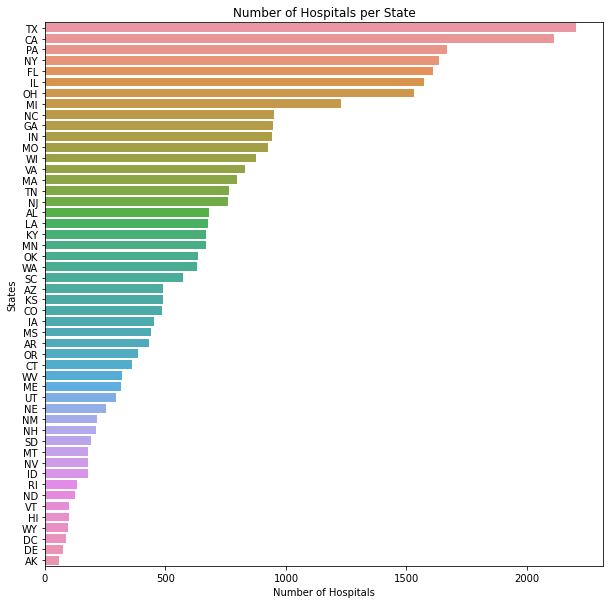

In [ ]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Number of Hospitals', y = 'provider_state', data = Total_state)
ax.set(xlabel = 'Number of Hospitals', ylabel = 'States')
ax.set_title('Number of Hospitals per State')

In [ ]:
display(Total_state)

provider_state  Number of Hospitals
0              TX                 2205
1              CA                 2113
2              PA                 1667
3              NY                 1634
4              FL                 1612
5              IL                 1571
6              OH                 1532
7              MI                 1228
8              NC                  949
9              GA                  946
10             IN                  944
11             MO                  927
12             WI                  876
13             VA                  828
14             MA                  798
15             TN                  765
16             NJ                  758
17             AL                  682
18             LA                  677
19             KY                  669
20             MN                  668
21             OK                  636
22             WA                  630
23             SC                  574
24             AZ                  490
25             KS                  488
26             CO                  485
27             IA                  453
28             MS                  440
29             AR                  431
30             OR                  386
31             CT                  361
32             WV                  321
33             ME                  315
34             UT                  293
35             NE                  253
36             NM                  217
37             NH                  213
38             SD                  191
39             MT                  179
40             NV                  177
41             ID                  177
42             RI                  135
43             ND                  124
44             VT                  100
45             HI                   99
46             WY                   94
47             DC                   89
48             DE                   73
49             AK                   59

#A: From the above barplot we can see that
Most TX - 2205

2nd Most CA - 2113

3rd Most PA - 1667

all have the the highest number of hospitals! 

Noticing that 

Least AK - 59

2nd Least DE - 73

3rd Least DC - 89

All have the least amount of hospitals. 


#Df_Inpatient

Cleaning df_Inpatient 

In [ ]:
df_Inpatient

In [ ]:
df_Inpatient = pd.DataFrame.from_dict(df_Inpatient)
df = clean_names(df_Inpatient)
df = remove_empty(df_Inpatient)
display(df_Inpatient)

# What 3 states have the Lowest and Highest amount of Discharges?

In [ ]:
Total_state = pd.value_counts(df_Inpatient['provider_state'])
Total_state = pd.DataFrame(Total_state)
Total_state = Total_state.reset_index()

In [ ]:
Total_state.columns = ['provider_state', 'average_total_payments']

Text(0.5, 1.0, 'Average total payments per State')

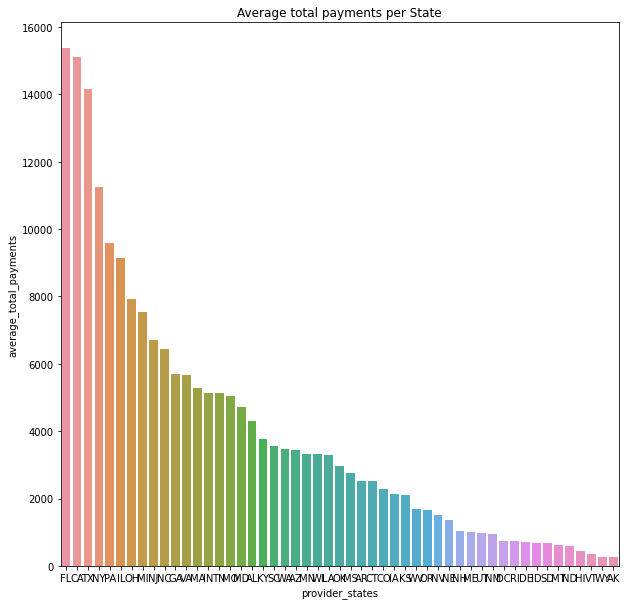

In [ ]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'provider_state', y = 'average_total_payments', data = Total_state)
ax.set(xlabel = 'provider_states', ylabel = 'average_total_payments')
ax.set_title('Average total payments per State')

In [ ]:
display(Total_state)

provider_state  average_total_payments
0              FL                   15371
1              CA                   15113
2              TX                   14171
3              NY                   11257
4              PA                    9586
5              IL                    9128
6              OH                    7917
7              MI                    7540
8              NJ                    6693
9              NC                    6427
10             GA                    5691
11             VA                    5677
12             MA                    5288
13             IN                    5123
14             TN                    5122
15             MO                    5040
16             MD                    4708
17             AL                    4310
18             KY                    3763
19             SC                    3555
20             WA                    3472
21             AZ                    3453
22             MN                    3335
23             WI                    3310
24             LA                    3297
25             OK                    2967
26             MS                    2753
27             AR                    2523
28             CT                    2517
29             CO                    2272
30             IA                    2130
31             KS                    2101
32             WV                    1693
33             OR                    1658
34             NV                    1512
35             NE                    1360
36             NH                    1032
37             ME                    1010
38             UT                     981
39             NM                     939
40             DC                     740
41             RI                     728
42             DE                     707
43             ID                     689
44             SD                     677
45             MT                     617
46             ND                     604
47             HI                     444
48             VT                     345
49             WY                     267
50             AK                     263

#Biggest difference in Treatment with drg_definition and average total payments?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, '')]

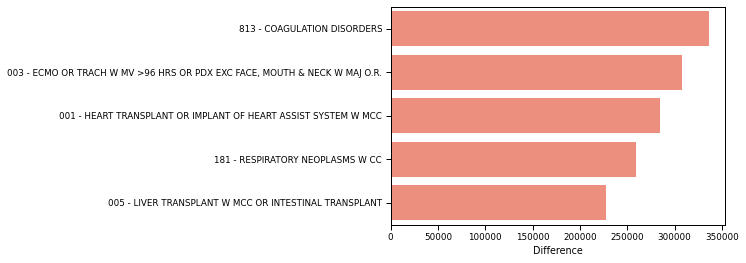

In [ ]:
# Biggest Payment Difference Treatment
minmax = df_Inpatient[['drg_definition','average_total_payments']].groupby(by='drg_definition').agg(['max','min'])
minmax['Difference'] = minmax[('average_total_payments', 'max')] - minmax[('average_total_payments', 'min')]
difference5 = minmax.sort_values(by='Difference',ascending=False).head(5)
sns.set_context("paper")
ax = sns.barplot(difference5["Difference"],difference5.index, color="tomato",alpha=0.8)
ax.set(ylabel=None)

#Inpatient average covered charges with the mean and standard deviation counts for top 5 average covered charges

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Average total payments ($)')

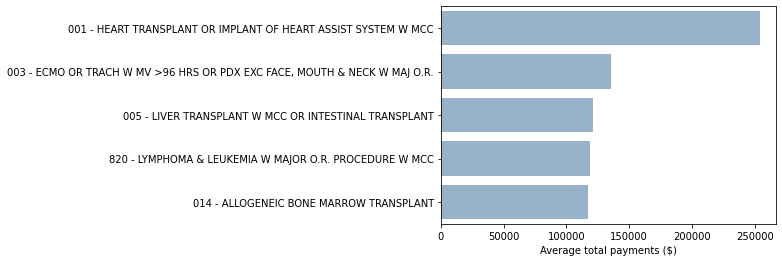

In [ ]:
df_table = df_Inpatient[['drg_definition', 'average_total_payments']].groupby(by='drg_definition').agg(['mean','std','count'])
df_table = df_table.sort_values(('average_total_payments','mean'), ascending=False).head(5)

fig,ax= plt.subplots()
fig = sns.barplot( df_table.iloc[:,0],df_table.index, color="steelblue",alpha=0.6)
ax.set(ylabel=None)
plt.xlabel("Average total payments ($)")

In [ ]:
df_table

average_total_payments  ...      
                                                                     mean  ... count
drg_definition                                                             ...      
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSI...          253942.444189  ...    74
003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FAC...          135509.606880  ...   407
005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRAN...          120902.756304  ...    46
820 - LYMPHOMA & LEUKEMIA W MAJOR O.R. PROCEDUR...          118663.880000  ...     1
014 - ALLOGENEIC BONE MARROW TRANSPLANT                     117285.263226  ...    31

[5 rows x 3 columns]

#Average total payments by state for 003 drg_definiton

Text(0.5, 1.0, 'Avg. Total Payments for DRG = 003')

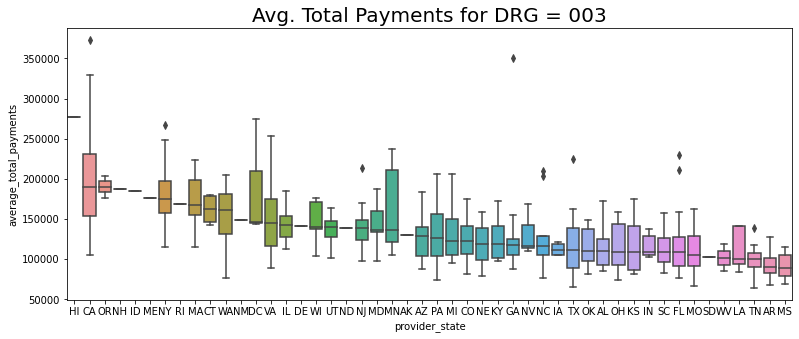

In [ ]:
df_Inpatient2 = df_Inpatient[df_Inpatient["drg_definition"] == "003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R."]
sorted_index = df_Inpatient2[['provider_state', 'average_total_payments']].groupby(by='provider_state').median().sort_values(by='average_total_payments',ascending=False).index
plt.figure(figsize=(13,5))
sns.boxplot(x="provider_state", y="average_total_payments",
            order = sorted_index, data=df_Inpatient2)
plt.title('Avg. Total Payments for DRG = 003',fontsize=20)

Q: What is New York States most frequent average total payment for drg_definition?
A:Here we can see that for NY NY drg_definition 003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJOR had the largest total payment of NY. As well as 003 being the most expensive and frequent average total cost drg defintion for NY.The mean for DRG 003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R. 135,509.606880 is for total average payments, where NY surpasses the average.

#Merged Datasets 

In [ ]:
import os
import glob
import pandas as pd

In [ ]:
# df_Outpatient
# df_Hospital
# df_Inpatient 

print('dfOut: ', len(df_Outpatient))
print('dfHos: ', len(df_Hospital))

dfOut:  32532
dfHos:  5314


# Merged Datasets 
Hospital and Outpatient by provider_id

In [ ]:
df_Outpatient

In [ ]:
df_Hospital['provider_id'] = df_Hospital['provider_id'].astype(str)
df_Outpatient['provider_id'] = df_Outpatient['provider_id'].astype(str)

In [ ]:
df_merged = df_Outpatient.merge(df_Hospital, how='left', left_on='provider_id', right_on='provider_id')

In [ ]:
df_merged.sample(10)

#Cleaning df_merged

In [ ]:
# remove any NaN from hospital_name 

df_merged_clean = df_merged[df_merged['hospital_name'].notna()]

In [ ]:
df_merged_clean.sample(15)

#Comparison of SBU Hospital and Carolina East Medical Center

In [ ]:
df_merged_clean_SB = df_merged_clean[df_merged_clean['hospital_name'] == 'SUNY/STONY BROOK UNIVERSITY HOSPITAL']
df_merged_clean_SB

In [ ]:
df_merged = df_Outpatient.merge(df_Hospital, how='left', left_on='provider_id', right_on='provider_id')

In [ ]:
df_merged_clean_CEMC = df_merged_clean[df_merged_clean['hospital_name'] == 'CAROLINA EAST MEDICAL CENTER']
df_merged_clean_CEMC

#Comparison of APC and Average Total Payments for CEMC AND SBU Hospital

In [ ]:
final_df_comparison = pd.concat([df_merged_clean_CEMC, df_merged_clean_SB])

In [ ]:
final_df_comparison.sample(10)


In [ ]:
final_df_comparison.pivot(index=['hospital_name'], columns='apc', values='average_total_payments')

apc                                   0012 - Level I Debridement & Destruction  ...  0690 - Level I Electronic Analysis of Devices
hospital_name                                                                   ...                                               
CAROLINA EAST MEDICAL CENTER                                         76.983077  ...                                            NaN
SUNY/STONY BROOK UNIVERSITY HOSPITAL                                       NaN  ...                                      38.450476

[2 rows x 16 columns]

# SBU Hospital Q: What is the difference between total payment for Stony Brook Hospital compared to another hospital from a different state?

The total average payments between Stony Brook University hospital and Carolina East Medical Center(CEMC) as we can also see CEMC is a government- Hospital District or Authority and stony brook ownership is by Government-state. Here we can see Stony Brook Hospital has 0 apc's for 0012, 0015 debridment compared to CEMC, and we see that Stony Brook University from this pivot table has higher cost of average total payments with Endoscopy upper airway compared to CEMC with approximately 6588 compared to Stony Brook's 8645.


In [ ]:
average_total_payments = pd.value_counts(final_df_comparison['hospital_name'])
average_total_payments = pd.DataFrame(average_total_payments)
average_total_payments = average_total_payments.reset_index()

In [ ]:
average_total_payments.columns = ['hospital_name', 'average_total_payments']

Text(0.5, 1.0, 'Average total payments for hospital')

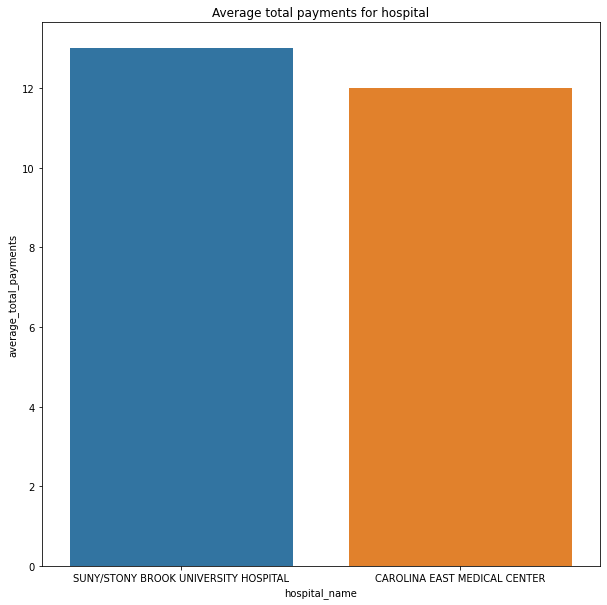

In [ ]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'hospital_name', y = 'average_total_payments', data = average_total_payments)
ax.set(xlabel = 'hospital_name', ylabel = 'average_total_payments')
ax.set_title('Average total payments for hospital')

As you can see from this barchart the average total of payments is higher for Stony Brook apc's compared to Carolina East Medical Center!

# SBU Hospital Q: What are the most expensive apc for SBU Hospital?
 -Merging of SBU hospital to find the APC with most expensive cost association.

In [ ]:
df_merged_clean_SB.pivot(index=['provider_id'], columns='apc', values= 'average_total_payments')

apc          0020 - Level II Excision/ Biopsy  ...  0690 - Level I Electronic Analysis of Devices
provider_id                                    ...                                               
330393                                948.683  ...                                      38.450476

[1 rows x 13 columns]

#A: The most expensive average total cost for APC's in the outpatient and hospital dataframe with SBU hospital is 
1. Level IV endoscopy 2307.21 Dollars
2. Level IV Nerver Injections 1325.64 Dollars
3. Level II Cardiac Imaging 1300.67 Dollars

# Merging df_hospital and df_Inpatient

In [ ]:
df_Hospital['provider_id'] = df_Hospital['provider_id'].astype(str)
df_Inpatient['provider_id'] = df_Inpatient['provider_id'].astype(str)

In [ ]:
df_merged2 = df_Inpatient.merge(df_Hospital, how='left', left_on='provider_id', right_on='provider_id')

In [ ]:
df_merged2.sample(10)

provider_id  ...                      location
13956        10113  ...                           NaN
168237      170146  ...  POINT (-94.786329 39.128582)
74778       110036  ...  POINT (-81.091827 32.031785)
116565      390133  ...  POINT (-75.518672 40.566772)
4704        100183  ...                           NaN
14438        30010  ...                           NaN
122139      490050  ...  POINT (-77.128654 38.889088)
1074        150002  ...  POINT (-87.357023 41.599436)
185763       50224  ...                           NaN
186642       50769  ...                           NaN

[10 rows x 40 columns]

# DRG_description of Stony Brook Hospital Inpatient
Q: What DRG was most common for Stony Brook?

In [ ]:
df_merged_clean2 = df_merged2[df_merged2['hospital_name'].notna()]

In [ ]:
df_merged_clean_SB2 = df_merged_clean2[df_merged_clean2['provider_id'] == '330393']
df_merged_clean_SB2

In [ ]:
display(df_merged_clean_SB2)

#SBU total discharges for DRG

In [ ]:
df_merged_clean_SB2.pivot(index=['provider_name'], columns='drg_definition', values='total_discharges')

drg_definition                       003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.  ...  982 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W CC
provider_name                                                                                                   ...                                                                      
UNIVERSITY HOSPITAL ( STONY BROOK )                                                 40                          ...                                                 15                   

[1 rows x 225 columns]


 Pivot table showing the number of total discharges for drg-definition at Stony Brook Hospital with that were most common

1st 40 Patients - 003 ECMO OR TRACH W MV

2nd 23 patients - 004 - TRACH W MV

3rd 17 patients - 023 - CRANIO W MAJOR DEV IMPL/ACUTE COMPLEX CNS PDX W MCC OR CHEMO IMPLANT

#SBU Hospital Inpatient Q: What are the most expensive drugs comparing Stony Brook's drg_definition & average total payments??
Answer: 
1.ECMO or TRACH - 216,636.88 Dollars

2.Trach W MV - 132,951.87 Dollars

3.Cranio W Major Dev - 69,981.35 Dollars

All three have the most expesnive total average payments for drg_definition with df_Hospital and df_Inpatient

In [ ]:
df_merged_clean_SB2.pivot(index=['provider_name'], columns='drg_definition', values= 'average_total_payments')

drg_definition                       003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.  ...  982 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W CC
provider_name                                                                                                   ...                                                                      
UNIVERSITY HOSPITAL ( STONY BROOK )                                          216636.88                          ...                                           29256.53                   

[1 rows x 225 columns]

#Profile Reports

In [ ]:
!pip install pandas-profiling==2.7.1 

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(df_Hospital,title ="Pandas Profiling Report Hospital_info")

In [ ]:
profile = ProfileReport(df_Outpatient,title ="Pandas Profiling Report Outpatient2015")

In [ ]:
profile

In [ ]:
profile = ProfileReport(df_Inpatient,title ="Pandas Profiling Report Inpatient2015")

In [ ]:
profile